In [9]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

In [10]:
num_classes=5
img_rows,img_cols=48,48
batch_size=32

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
train_data_dir='/content/drive/MyDrive/FER2013FIX/train'
validation_data_dir='/content/drive/MyDrive/FER2013FIX/validation'

In [13]:
train_datagen = ImageDataGenerator(
					rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)


Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [14]:
model = Sequential()

#Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

In [15]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('EmotionDetectionModelGakPakeKucek.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 24256
nb_validation_samples = 3006
epochs=25

history=model.fit(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/25
758/758 [==============================] - 800s 1s/step - loss: 2.0397 - accuracy: 0.2781 - val_loss: 1.3398 - val_accuracy: 0.4556

Epoch 00001: val_loss improved from inf to 1.33978, saving model to EmotionDetectionModelGakPakeKucek.h5
Epoch 2/25
758/758 [==============================] - 41s 54ms/step - loss: 1.2438 - accuracy: 0.4923 - val_loss: 1.2332 - val_accuracy: 0.5218

Epoch 00002: val_loss improved from 1.33978 to 1.23321, saving model to EmotionDetectionModelGakPakeKucek.h5
Epoch 3/25
758/758 [==============================] - 40s 53ms/step - loss: 1.0803 - accuracy: 0.5683 - val_loss: 1.1588 - val_accuracy: 0.5706

Epoch 00003: val_loss improved from 1.23321 to 1.15885, saving model to EmotionDetectionModelGakPakeKucek.h5
Epoch 4/25
758/758 [==============================] - 41s 54ms/step - loss: 0.9835 - accuracy: 0.6166 - val_loss: 1.2043 - val_accuracy: 0.5783

Epoch 00004: val_loss did not improve from 1.15885
Epoch 5/25
758/758 [===========================

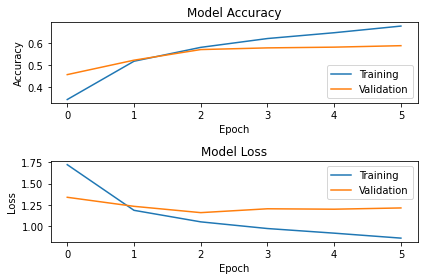

In [17]:
import matplotlib.pyplot as plt
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [ ]:
#PAKE INI KALO RUNTIME ABIS
from keras.models import load_model
model = load_model('/content/drive/MyDrive/EmotionDetectionModelGakPakeKucek.h5')

In [ ]:
nb_train_samples = 24256
nb_validation_samples = 3006
epochs=25


In [18]:
import numpy as np
Y_pred = model.predict(validation_generator, nb_train_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

Confusion Matrix
[[ 80 183  75  81  72]
 [166 289 142 162 120]
 [ 79 239 119 115  74]
 [ 90 209 112 111  72]
 [ 68 137  74  79  58]]


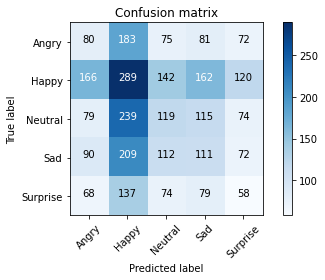

Classification Report
              precision    recall  f1-score   support

       Angry       0.17      0.16      0.16       491
       Happy       0.27      0.33      0.30       879
     Neutral       0.23      0.19      0.21       626
         Sad       0.20      0.19      0.19       594
    Surprise       0.15      0.14      0.14       416

    accuracy                           0.22      3006
   macro avg       0.20      0.20      0.20      3006
weighted avg       0.21      0.22      0.22      3006



In [19]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


print('Confusion Matrix')
y_true = validation_generator.classes
y_pred = y_pred
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry','Happy', 'Neutral', 'Sad', 'Surprise']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
print('Classification Report')
target_names = ['Angry','Happy','Neutral','Sad','Surprise']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))